## Hypothesis
To predict the incentive level requested to program dishwasher after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [70]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       3       4       4       6       7     183 


  1   2   3   4   5   6   7 
 51  53  64 121  37 118  35 

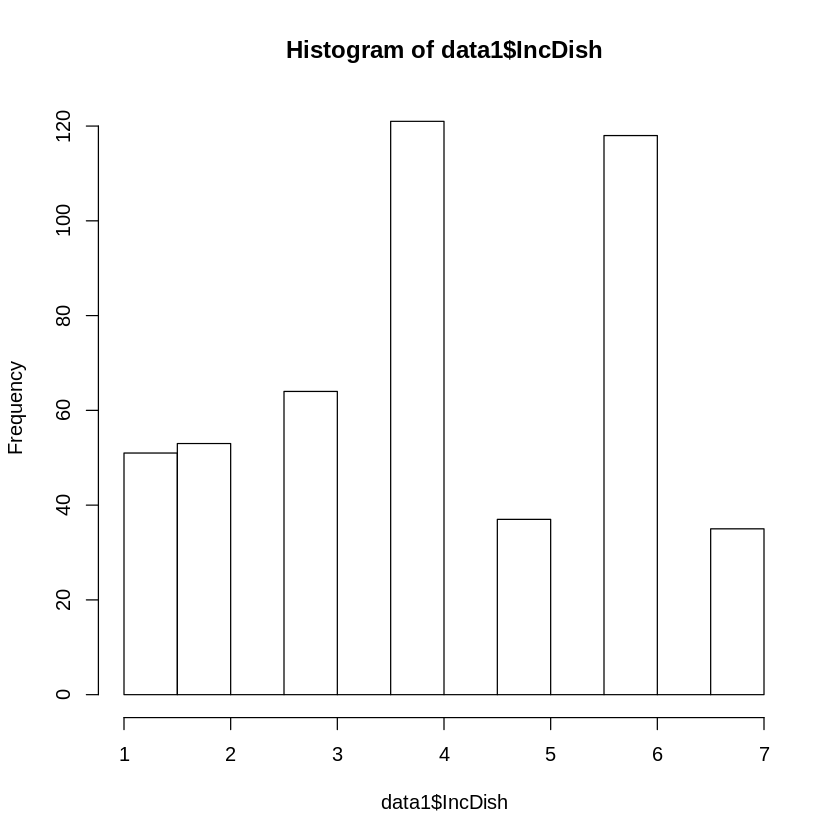

In [71]:
summary(data1$IncDish)
table(data1$IncDish)
hist(data1$IncDish)

In [72]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      


In [73]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 101
[1] 454 101


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.1     6.0     7.0 


  1   2   3   4   5   6   7 
 48  50  60 119  34 111  32 

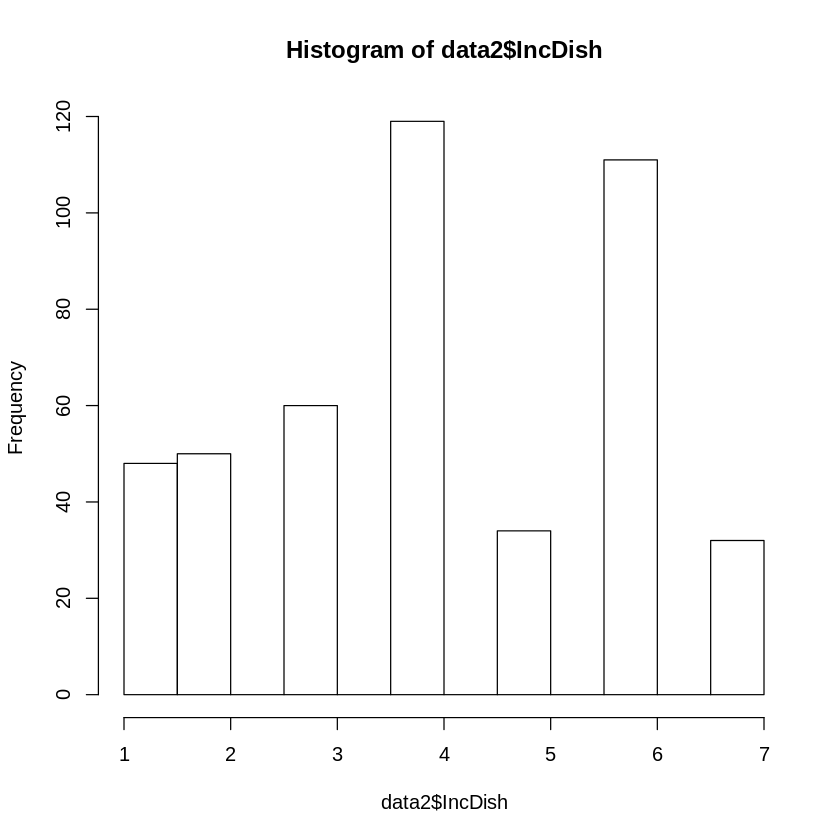

In [74]:
summary(data2$IncDish)
table(data2$IncDish)
hist(data2$IncDish)

In [75]:
sort(names(data2))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncDish"    "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
 [71] "MC3"        "MC4"        "MC5"        "MCBill"     "OwnRent"   
 [76] "PBC1"       "PBC2"       "PBC3R"      "PBC4"       "PBC5"      
 [81] "Political"  "RewardForm" "SN"         "SN1"        "SN2"       
 [86] "SN3"        "SN4"        "Sqft"       "SqftCate"   "State"     
 [91] "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg"
 [96] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "Winter_avg"
[101] "X.9to5"

In [76]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"ConvB1")

In [77]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncDish"    "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
 [71] "MC3"        "MC4"        "MC5"        "MCBill"     "OwnRent"   
 [76] "PBC1"       "PBC2"       "PBC3R"      "PBC4"       "PBC5"      
 [81] "Political"  "RewardForm" "SN"         "SN1"        "SN2"       
 [86] "SN3"        "SN4"        "Sqft"       "SqftCate"   "State"     
 [91] "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg"
 [96] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "Winter_avg"
[101] "X.9to5"

[1] "Age"        "Atti"       "ComfNS"     "ConvB1"     "Educ"      
 [6] "EnergyC"    "Ethnic"     "Frugal"     "Gender"     "HabitC"    
[11] "HabitG"     "HouseholdS" "Income"     "MC"         "OwnRent"   
[16] "PBC"        "Political"  "SN"         "SqftCate"   "SubNorm"   
[21] "Trust"

In [78]:
data1 <- data2[, which(names(data2) %in% c("IncDish",IVS))];
sort(names(data1))

[1] "Age"        "Atti"       "ComfNS"     "ConvB1"     "Educ"      
 [6] "EnergyC"    "Ethnic"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "IncDish"    "Income"     "MC"         "OwnRent"   
[16] "Political"  "SN"         "SqftCate"   "SubNorm"

In [79]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [80]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [81]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncDish"    "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "MC"         "ComfNS"     "Atti"      
[16] "SubNorm"    "SN"         "HabitG"     "HabitC"

In [82]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [83]:
hiCor(data2,.7)

<0 x 0 matrix>

In [84]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:21];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:21){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


ERROR: Error in prcomp(data2, retx = F, scale = T)$rotation[, 1:21]: subscript out of bounds


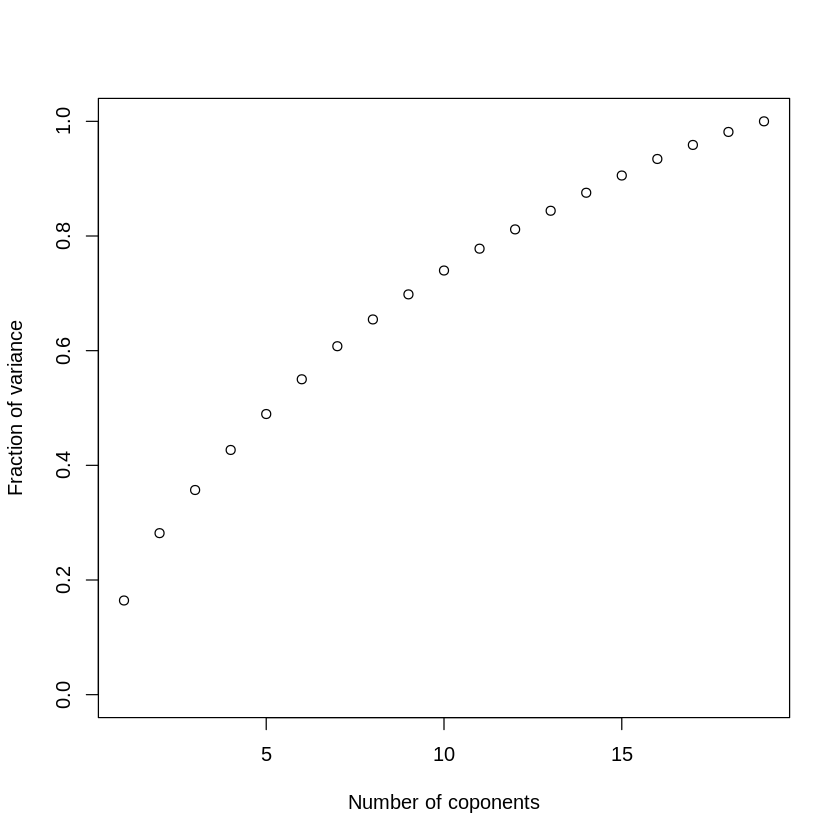

In [85]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [86]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [87]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,15,0.48
EnergyC,12,0.43
SqftCate,6,0.37
ConvB1,2,0.32
OwnRent,5,0.31
MC,13,0.31
SubNorm,16,0.28
HabitG,18,0.24
Age,3,0.23
Income,10,0.23
HouseholdS,7,0.22


In [88]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [93]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'EnergyC', 'MC', 'ConvB1', 'ComfNS', 'HabitG')

In [94]:
fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [95]:
table(data2[,"IncDish"])


  1   2   3   4   5   6   7 
 48  50  60 119  34 111  32 

In [96]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.106 -1.162 -0.008  1.480  4.009 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.4915     0.9840    2.53   0.0117 * 
Age           0.0246     0.0084    2.93   0.0036 **
Gender        0.1405     0.1759    0.80   0.4248   
OwnRent      -0.0326     0.1915   -0.17   0.8649   
SqftCate      0.0444     0.0952    0.47   0.6412   
HouseholdS    0.1277     0.0750    1.70   0.0893 . 
Political     0.0811     0.1045    0.78   0.4381   
Ethnic       -0.3881     0.2448   -1.59   0.1136   
Income       -0.0817     0.0502   -1.63   0.1045   
Educ         -0.0198     0.0803   -0.25   0.8050   
EnergyC      -0.1646     0.0645   -2.55   0.0110 * 
MC            0.1073     0.0919    1.17   0.2434   
ConvB1        0.0883     0.0784    1.13   0.2609   
ComfNS        0.0915     0.0588    1.55   0.1208   
HabitG        0.0552     0.0785    0.70   0.4823   
---
Signif. codes:  0 '***' 0

In [24]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.780 -1.188  0.026  1.219  3.807 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.6402     3.4908    0.47  0.63907    
Age           0.0449     0.0133    3.38  0.00091 ***
Gender        0.4085     0.2778    1.47  0.14325    
OwnRent      -0.1466     0.2888   -0.51  0.61248    
SqftCate     -0.0634     0.1523   -0.42  0.67777    
HouseholdS    0.2059     0.1131    1.82  0.07048 .  
Political     0.1907     0.1664    1.15  0.25355    
Ethnic       -0.9944     0.3452   -2.88  0.00449 ** 
Income       -0.0799     0.0750   -1.07  0.28823    
Educ          0.0302     0.1271    0.24  0.81276    
Latitude     -0.0141     0.0440   -0.32  0.74810    
EnergyC      -0.1033     0.0985   -1.05  0.29603    
MC           -0.0396     0.1498   -0.26  0.79184    
ComfNS        0.1816     0.0935    1.94  0.05370 .  
HabitC       -0.0176     0.1069   -0

In [25]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.874 -1.159  0.032  1.425  3.454 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  5.958019   2.550326    2.34   0.0203 * 
Age          0.007681   0.010984    0.70   0.4850   
Gender       0.081787   0.236223    0.35   0.7295   
OwnRent      0.102460   0.267765    0.38   0.7023   
SqftCate     0.123855   0.126662    0.98   0.3291   
HouseholdS   0.042940   0.107536    0.40   0.6900   
Political   -0.067387   0.139935   -0.48   0.6305   
Ethnic       0.199243   0.364745    0.55   0.5854   
Income      -0.093389   0.069909   -1.34   0.1828   
Educ        -0.000946   0.107362   -0.01   0.9930   
Latitude    -0.042987   0.050194   -0.86   0.3926   
EnergyC     -0.239672   0.085853   -2.79   0.0057 **
MC           0.126854   0.111479    1.14   0.2562   
ComfNS       0.040329   0.082888    0.49   0.6270   
HabitC      -0.040810   0.085850   -

In [26]:
#17 states with highest average temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-4.222 -1.245  0.157  1.346  3.422 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   4.0670     1.5842    2.57   0.0109 * 
Age           0.0371     0.0121    3.08   0.0023 **
Gender        0.0741     0.2439    0.30   0.7615   
OwnRent      -0.1635     0.2622   -0.62   0.5336   
SqftCate      0.0504     0.1358    0.37   0.7108   
HouseholdS    0.0792     0.1009    0.79   0.4331   
Political    -0.0404     0.1455   -0.28   0.7814   
Ethnic       -0.7362     0.3024   -2.43   0.0157 * 
Income       -0.0785     0.0680   -1.15   0.2494   
Educ         -0.0478     0.1110   -0.43   0.6672   
Latitude     -0.0454     0.0346   -1.31   0.1902   
EnergyC      -0.1393     0.0817   -1.70   0.0897 . 
MC            0.1835     0.1247    1.47   0.1426   
ComfNS        0.1154     0.0875    1.32   0.1887   
Hab

In [27]:
#17 middle states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.975 -0.983 -0.080  1.226  3.779 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.40079    6.16252    0.07    0.948  
Age          0.00712    0.01990    0.36    0.721  
Gender       0.36683    0.42934    0.85    0.396  
OwnRent      0.27582    0.45843    0.60    0.549  
SqftCate     0.03855    0.22915    0.17    0.867  
HouseholdS   0.17829    0.19138    0.93    0.354  
Political    0.28932    0.27415    1.06    0.295  
Ethnic       0.17643    0.76958    0.23    0.819  
Income      -0.06922    0.12579   -0.55    0.584  
Educ         0.07236    0.21702    0.33    0.740  
Latitude     0.12012    0.16013    0.75    0.456  
EnergyC     -0.33146    0.20147   -1.65    0.104  
MC          -0.09048    0.20440   -0.44    0.659  
ComfNS       0.01258    0.14930    0.08    0.933  
HabitC      -0.289

In [28]:
#bottom 17 states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-3.350 -1.131 -0.052  1.435  3.706 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.12138    3.70268    0.57     0.57
Age          0.01459    0.01765    0.83     0.41
Gender       0.03189    0.39842    0.08     0.94
OwnRent      0.04600    0.43387    0.11     0.92
SqftCate     0.02741    0.20399    0.13     0.89
HouseholdS   0.18359    0.18666    0.98     0.33
Political    0.09373    0.23394    0.40     0.69
Ethnic       0.30127    0.67450    0.45     0.66
Income      -0.09560    0.12170   -0.79     0.43
Educ         0.03263    0.17128    0.19     0.85
Latitude     0.00175    0.06156    0.03     0.98
EnergyC     -0.19286    0.14429   -1.34     0.18
MC           0.12320    0.19221    0.64     0.52
ComfNS       0.14480    0.12701    1.14     0.26
HabitC       0.08091    0.14368    0.56     0.57

In [29]:
#top 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-2.850 -1.074 -0.181  1.025  4.099 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.62278    3.77439    0.69    0.489  
Age          0.02773    0.01796    1.54    0.127  
Gender       0.18474    0.41639    0.44    0.659  
OwnRent     -0.31055    0.45817   -0.68    0.500  
SqftCate     0.15642    0.23492    0.67    0.508  
HouseholdS  -0.04339    0.19959   -0.22    0.829  
Political    0.00147    0.25212    0.01    0.995  
Ethnic       0.26674    0.71161    0.37    0.709  
Income      -0.24430    0.13318   -1.83    0.071 .
Educ        -0.01030    0.19273   -0.05    0.958  
Latitude    -0.00925    0.06654   -0.14    0.890  
EnergyC     -0.20774    0.15368   -1.35    0.181  
MC           0.31672    0.20569    1.54    0.128  
ComfNS       0.12859    0.13602    0.95    0.348  
HabitC       0.247

In [30]:
#middle 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.067 -1.256  0.084  1.442  3.461 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7.76222    3.29605    2.36    0.020 *
Age         -0.01034    0.01665   -0.62    0.536  
Gender       0.20021    0.34380    0.58    0.561  
OwnRent      0.41298    0.38703    1.07    0.288  
SqftCate     0.11778    0.17718    0.66    0.507  
HouseholdS   0.12886    0.15198    0.85    0.398  
Political   -0.11950    0.19673   -0.61    0.545  
Ethnic       0.24032    0.50275    0.48    0.633  
Income      -0.13201    0.09499   -1.39    0.167  
Educ        -0.03861    0.15315   -0.25    0.801  
Latitude    -0.05922    0.05619   -1.05    0.294  
EnergyC     -0.22450    0.11695   -1.92    0.057 .
MC          -0.01781    0.15495   -0.11    0.909  
ComfNS       0.00865    0.12527    0.07    0.945  
HabitC      -0.115

In [31]:
#bottom 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-3.853 -1.179  0.046  1.309  3.758 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.72930    2.41072    1.96  0.05116 .  
Age          0.04405    0.01205    3.66  0.00033 ***
Gender       0.13632    0.25341    0.54  0.59121    
OwnRent     -0.18240    0.27334   -0.67  0.50534    
SqftCate    -0.04799    0.13831   -0.35  0.72899    
HouseholdS   0.11865    0.10500    1.13  0.25981    
Political    0.17789    0.15142    1.17  0.24145    
Ethnic      -0.96896    0.33280   -2.91  0.00400 ** 
Income      -0.02672    0.07136   -0.37  0.70845    
Educ        -0.00612    0.11757   -0.05  0.95857    
Latitude    -0.02469    0.03980   -0.62  0.53578    
EnergyC     -0.12697    0.09301   -1.37  0.17373    
MC           0.08424    0.13573    0.62  0.53554    
ComfNS       0.19545    0.08643    2.26  

In [32]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,43.834,43.834,14.7835,0.00016
Gender,1,1.161,1.161,0.3916,0.53216
OwnRent,1,4.345,4.345,1.4653,0.22749
SqftCate,1,0.021,0.021,0.0072,0.93234
HouseholdS,1,6.070,6.070,2.0471,0.15403
Political,1,4.292,4.292,1.4476,0.23032
Ethnic,1,19.395,19.395,6.5413,0.01127
Income,1,1.088,1.088,0.3668,0.54540
Educ,1,0.467,0.467,0.1574,0.69196
Latitude,1,0.123,0.123,0.0415,0.83870


In [33]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
   IncDish        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.99       0.98       0.90       0.99       1.00       0.99       0.94 
    Ethnic     Income       Educ   Latitude    EnergyC         MC     ComfNS 
      0.98       0.98       0.98       0.36       0.49       0.74       0.94 
      Atti    SubNorm         SN     HabitG     HabitC Summer_avg Winter_avg 
      0.37       0.78       0.95       0.86       0.92       0.23       0.18 

Loadings:
           Factor1 Factor2
Latitude    0.80          
Summer_avg -0.88          
Winter_avg  0.90          
EnergyC             0.71  
Atti                0.79  
IncDish                   
Age                       
Gender              0.30  
OwnRent                   
SqftCate                  
HouseholdS                
Political                 
Ethnic                    
Income                    
Educ                      
MC          

In [34]:
mod = lm(IncHomeS~ComfNS+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)

ERROR: Error in eval(expr, envir, enclos): object 'IncHomeS' not found


In [ ]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [ ]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

In [ ]:
library(mgcv)


In [ ]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)


In [ ]:
plot(mGam)

In [ ]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)


In [ ]:
anova(mod1)

In [ ]:
drop1(mod1)

In [ ]:
library(bnlearn)

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [ ]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)

In [ ]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)